In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_pickle('RES_DF_120SAMPLES_EN_TL.pkl')

In [3]:
df = df.sort_values('language')
df

,text,similarity values,label,predictions,language,sim mean,pred mean,n real predicted,n fake predicted,n nan predicted
0,WEF Chauffeur Admits VIP Elites Refuse To Ride...,"[0.9647811, 0.7166927, 0.60091877, 0.4730269, ...",0,"[0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, nan, ...",en,0.574948,0.500000,4,4,2
88,"As pandemic emergencies end, some patients wit...","[0.7170942, 0.926748, 0.88548195, 0.8472892, 0...",1,"[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, nan, ...",en,0.794573,0.750000,6,2,2
60,Gabon ends search mission for missing ferry pa...,"[0.93588334, 0.9428644, 0.93588334, -0.0104721...",1,"[1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, nan, nan, ...",en,0.590329,0.714286,5,2,3
61,India hospitals on alert as Covid-19 cases rise,"[0.91279817, 0.9094857, 0.9796678, 0.86296636,...",1,"[1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, nan, ...",en,0.849935,0.625000,5,3,2
62,'I looked at my foot and saw I was missing toes',"[0.03328213, 0.5334386, 0.32106513, 0.3003353,...",1,"[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, nan, ...",en,0.303827,0.875000,7,1,2
...,...,...,...,...,...,...,...,...,...,...
55,"Pinay, viral matapos ipakita ang mahigit 200 n...","[0.91271055, 0.38336915, 0.40737313, 0.4452204...",0,"[0.0, 1.0, 1.0, 1.0, nan, nan, nan, nan, nan, ...",tl,0.537168,0.750000,3,1,6
56,"Dambuhalang tilapia na may timbang 5.2 kilos,...","[0.7222295, 0.7222295, 0.93637717, 0.28171557,...",0,"[1.0, 1.0, 0.0, 0.0, 0.0, nan, nan, nan, nan, ...",tl,0.698481,0.400000,2,3,5
57,Foreigner naglalako nalang matapos 'mabankcrup...,"[0.9655849, 0.31836623, nan, nan, nan, nan, na...",0,"[0.0, 1.0, nan, nan, nan, nan, nan, nan, nan, ...",tl,0.641976,0.500000,1,1,8
44,Ahensya ng Shopee inereklamo ng mga delivery r...,"[0.94705904, 0.26876527, 0.61796796, 0.3774594...",0,"[0.0, 0.0, 1.0, 0.0, 1.0, 1.0, nan, nan, nan, ...",tl,0.483247,0.500000,3,3,4


In [4]:
df['n real predicted'] = df['n real predicted'].values/10
df['n fake predicted'] = df['n fake predicted'].values/10
df['n nan predicted'] = df['n nan predicted'].values/10

In [5]:
df.text.values

array(['WEF Chauffeur Admits VIP Elites Refuse To Ride In Electric Cars, Demand Gas',
       "As pandemic emergencies end, some patients with long COVID feel 'swept under the rug'",
       'Gabon ends search mission for missing ferry passengers',
       'India hospitals on alert as Covid-19 cases rise',
       "'I looked at my foot and saw I was missing toes'",
       "Parliament-Funkadelic singer Clarence 'Fuzzy' Haskins dies at 81",
       'How the war in Ukraine has forever changed the children in one kindergarten class',
       'World powers condemn violence as clashes erupt in Sudan',
       'India’s Rahul Gandhi gets bail after he challenges jail sentence',
       "New Zealand's Jacinda Ardern takes on a new role after leaving politics this week",
       'North Korea executes people for sharing S Korean media: Report',
       'An Israeli police raid on the Al-Aqsa Mosque triggers a spate of violence',
       "'Why did you leave me behind?'",
       'Saudi bourse rises as it reope

In [6]:
from transformers import pipeline


en_model = pipeline(model="gloobdoob/english-headline-classifier-fake-news", top_k=None)
tl_model = pipeline(model="gloobdoob/tagalog-fake-news-headline-classifier-distilbert", top_k=None)


In [7]:
pred = en_model("haha woke brandon")
pred[0]

[{'label': 'LABEL_0', 'score': 0.9013998508453369},
 {'label': 'LABEL_1', 'score': 0.09860020130872726}]

In [8]:
en_df = df[df['language']=='en']
tl_df = df[df['language']=='tl']

In [9]:
en_mscores = en_model(list(en_df.text.values))
tl_mscores = tl_model(list(tl_df.text.values))

In [10]:
tl_mscores

[[{'label': 'LABEL_1', 'score': 1.0},
  {'label': 'LABEL_0', 'score': 5.118296897421715e-08}],
 [{'label': 'LABEL_1', 'score': 0.9999998807907104},
  {'label': 'LABEL_0', 'score': 6.119515916225282e-08}],
 [{'label': 'LABEL_1', 'score': 1.0},
  {'label': 'LABEL_0', 'score': 5.475913411601141e-08}],
 [{'label': 'LABEL_1', 'score': 0.9999998807907104},
  {'label': 'LABEL_0', 'score': 9.865303951528404e-08}],
 [{'label': 'LABEL_0', 'score': 0.9997419714927673},
  {'label': 'LABEL_1', 'score': 0.0002579889551270753}],
 [{'label': 'LABEL_1', 'score': 1.0},
  {'label': 'LABEL_0', 'score': 5.94552140853466e-08}],
 [{'label': 'LABEL_1', 'score': 0.9999998807907104},
  {'label': 'LABEL_0', 'score': 6.228832205579238e-08}],
 [{'label': 'LABEL_1', 'score': 1.0},
  {'label': 'LABEL_0', 'score': 5.0413195396004085e-08}],
 [{'label': 'LABEL_1', 'score': 1.0},
  {'label': 'LABEL_0', 'score': 5.754228027399222e-08}],
 [{'label': 'LABEL_1', 'score': 0.9999998807907104},
  {'label': 'LABEL_0', 'score': 

In [11]:
len(en_mscores)

60

In [12]:
from collections import defaultdict
en_dscores = defaultdict(list)
tl_dscores = defaultdict(list)
import numpy as np

for score_arr in en_mscores:
    for score in score_arr:
        if score['label'] == 'LABEL_0':
            en_dscores['headline fake pred'].append(np.float32(score['score']))
        if score['label'] == 'LABEL_1':
            en_dscores['headline real pred'].append(np.float32(score['score']))

for score_arr in tl_mscores:
    for score in score_arr:
        if score['label'] == 'LABEL_0':
            tl_dscores['headline fake pred'].append(np.float32(score['score']))
        if score['label'] == 'LABEL_1':
            tl_dscores['headline real pred'].append(np.float32(score['score']))
    

In [13]:
en_df['headline fake pred'] = en_dscores['headline fake pred']
en_df['headline real pred'] = en_dscores['headline real pred']


tl_df['headline fake pred'] = tl_dscores['headline fake pred']
tl_df['headline real pred'] = tl_dscores['headline real pred']

C:\Users\cvaal\AppData\Local\Temp\ipykernel_31136\1155292423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_df['headline fake pred'] = en_dscores['headline fake pred']
C:\Users\cvaal\AppData\Local\Temp\ipykernel_31136\1155292423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_df['headline real pred'] = en_dscores['headline real pred']
C:\Users\cvaal\AppData\Local\Temp\ipykernel_31136\1155292423.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [14]:
df = pd.concat([en_df, tl_df])

In [15]:
df

,text,similarity values,label,predictions,language,sim mean,pred mean,n real predicted,n fake predicted,n nan predicted,headline fake pred,headline real pred
0,WEF Chauffeur Admits VIP Elites Refuse To Ride...,"[0.9647811, 0.7166927, 0.60091877, 0.4730269, ...",0,"[0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, nan, ...",en,0.574948,0.500000,0.4,0.4,0.2,9.999999e-01,1.584624e-07
88,"As pandemic emergencies end, some patients wit...","[0.7170942, 0.926748, 0.88548195, 0.8472892, 0...",1,"[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, nan, ...",en,0.794573,0.750000,0.6,0.2,0.2,2.464087e-07,9.999998e-01
60,Gabon ends search mission for missing ferry pa...,"[0.93588334, 0.9428644, 0.93588334, -0.0104721...",1,"[1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, nan, nan, ...",en,0.590329,0.714286,0.5,0.2,0.3,1.878089e-07,9.999998e-01
61,India hospitals on alert as Covid-19 cases rise,"[0.91279817, 0.9094857, 0.9796678, 0.86296636,...",1,"[1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, nan, ...",en,0.849935,0.625000,0.5,0.3,0.2,3.005852e-07,9.999996e-01
62,'I looked at my foot and saw I was missing toes',"[0.03328213, 0.5334386, 0.32106513, 0.3003353,...",1,"[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, nan, ...",en,0.303827,0.875000,0.7,0.1,0.2,2.625534e-07,9.999998e-01
...,...,...,...,...,...,...,...,...,...,...,...,...
55,"Pinay, viral matapos ipakita ang mahigit 200 n...","[0.91271055, 0.38336915, 0.40737313, 0.4452204...",0,"[0.0, 1.0, 1.0, 1.0, nan, nan, nan, nan, nan, ...",tl,0.537168,0.750000,0.3,0.1,0.6,9.999999e-01,1.117930e-07
56,"Dambuhalang tilapia na may timbang 5.2 kilos,...","[0.7222295, 0.7222295, 0.93637717, 0.28171557,...",0,"[1.0, 1.0, 0.0, 0.0, 0.0, nan, nan, nan, nan, ...",tl,0.698481,0.400000,0.2,0.3,0.5,9.999999e-01,7.051867e-08
57,Foreigner naglalako nalang matapos 'mabankcrup...,"[0.9655849, 0.31836623, nan, nan, nan, nan, na...",0,"[0.0, 1.0, nan, nan, nan, nan, nan, nan, nan, ...",tl,0.641976,0.500000,0.1,0.1,0.8,2.385784e-07,9.999998e-01
44,Ahensya ng Shopee inereklamo ng mga delivery r...,"[0.94705904, 0.26876527, 0.61796796, 0.3774594...",0,"[0.0, 0.0, 1.0, 0.0, 1.0, 1.0, nan, nan, nan, ...",tl,0.483247,0.500000,0.3,0.3,0.4,9.999999e-01,7.322440e-08


In [16]:
df['sim mean'].corr(df['label'])

0.3881011110044027

In [17]:
df['pred mean'].corr(df['label'])

-0.0030593698080640932

In [18]:
df['n real predicted'].corr(df['label'])

0.09591835406940313

In [19]:
df['n fake predicted'].corr(df['label'])

0.13474908579174383

In [20]:
df['n nan predicted'].corr(df['label'])

-0.26208852600585814

In [21]:
df['sim mean'].corr(df['n nan predicted'])

-0.34065003764694773

In [22]:
df['sim mean'].corr(df['label'])
df['pred mean'].corr(df['label'])
print('fake news similarity mean:', df[df['label'] == 0]['sim mean'].mean())
print('real news similarity mean:', df[df['label'] == 1]['sim mean'].mean())
print('\n')
print('fake news similarity std:', df[df['label'] == 0]['sim mean'].std())
print('real news similarity std:', df[df['label'] == 1]['sim mean'].std())
print('\n')
print('fake news similarity skew:', df[df['label'] == 0]['sim mean'].skew())
print('real news similarity skew:', df[df['label'] == 1]['sim mean'].skew())
print('\n')
print('fake site prediction mean:', df[df['label'] == 0]['pred mean'].mean())
print('real site prediction mean:', df[df['label'] == 1]['pred mean'].mean())
print('\n')
print('fake site prediction std:', df[df['label'] == 0]['pred mean'].std())
print('real site prediction std:', df[df['label'] == 1]['pred mean'].std())
print('\n')
print('fake news prediction skew:', df[df['label'] == 0]['pred mean'].skew())
print('real news prediction skew:', df[df['label'] == 1]['pred mean'].skew())

fake news similarity mean: 0.5875263
real news similarity mean: 0.6749527


fake news similarity std: 0.09937383
real news similarity std: 0.10973159


fake news similarity skew: -0.2748174
real news similarity skew: -0.9380851


fake site prediction mean: 0.59278446
real site prediction mean: 0.5910318


fake site prediction std: 0.26604855
real site prediction std: 0.30998832


fake news prediction skew: -0.098192126
real news prediction skew: -0.17286307


In [23]:
print('mean of real predictions in fake news', df[df['label'] == 0]['n real predicted'].mean())
print('mean of real predictions in real news', df[df['label'] == 1]['n real predicted'].mean())
print('\n')
print('mean of fake predictions in fake news', df[df['label'] == 0]['n fake predicted'].mean())
print('mean of fake predictions in real news', df[df['label'] == 1]['n fake predicted'].mean())
print('\n')
print('mean of nan predictions in fake news', df[df['label'] == 0]['n nan predicted'].mean())
print('mean of nan predictions in real news', df[df['label'] == 1]['n nan predicted'].mean())

mean of real predictions in fake news 0.44500000000000006
mean of real predictions in real news 0.5066666666666667


mean of fake predictions in fake news 0.24166666666666667
mean of fake predictions in real news 0.295


mean of nan predictions in fake news 0.31333333333333335
mean of nan predictions in real news 0.19833333333333336


In [24]:
print('mode of real predictions in fake news', df[df['label'] == 0]['n real predicted'].mode())
print('mode of real predictions in real news', df[df['label'] == 1]['n real predicted'].mode())
print('\n')
print('mode of fake predictions in fake news', df[df['label'] == 0]['n fake predicted'].mode())
print('mode of fake predictions in real news', df[df['label'] == 1]['n fake predicted'].mode())
print('\n')
print('mode of nan predictions in fake news', df[df['label'] == 0]['n nan predicted'].mode())
print('mode of nan predictions in real news', df[df['label'] == 1]['n nan predicted'].mode())

mode of real predictions in fake news 0    0.3
Name: n real predicted, dtype: float64
mode of real predictions in real news 0    0.2
Name: n real predicted, dtype: float64


mode of fake predictions in fake news 0    0.3
Name: n fake predicted, dtype: float64
mode of fake predictions in real news 0    0.1
Name: n fake predicted, dtype: float64


mode of nan predictions in fake news 0    0.0
Name: n nan predicted, dtype: float64
mode of nan predictions in real news 0    0.0
Name: n nan predicted, dtype: float64


In [25]:
print('median of real predictions in fake news', df[df['label'] == 0]['n real predicted'].median())
print('median of real predictions in real news', df[df['label'] == 1]['n real predicted'].median())
print('\n')
print('median of fake predictions in fake news', df[df['label'] == 0]['n fake predicted'].median())
print('median of fake predictions in real news', df[df['label'] == 1]['n fake predicted'].median())
print('\n')
print('median of nan predictions in fake news', df[df['label'] == 0]['n nan predicted'].median())
print('median of nan predictions in real news', df[df['label'] == 1]['n nan predicted'].median())

median of real predictions in fake news 0.3
median of real predictions in real news 0.45


median of fake predictions in fake news 0.2
median of fake predictions in real news 0.25


median of nan predictions in fake news 0.3
median of nan predictions in real news 0.2


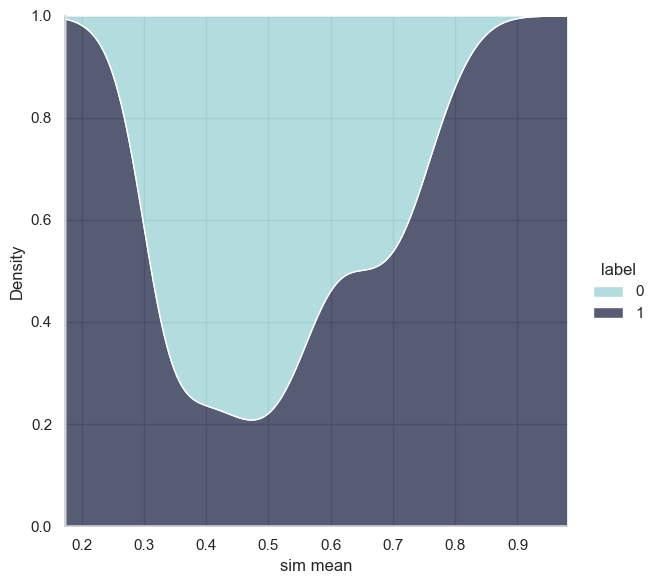

In [26]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.displot(
    data=df,
    x="sim mean", hue="label",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)


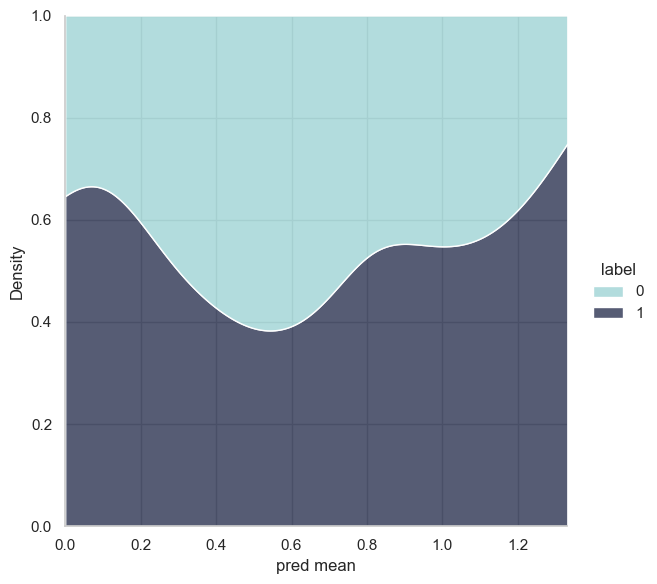

In [27]:
sns.displot(
    data=df,
    x="pred mean", hue="label",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

In [28]:
df.columns.values

array(['text', 'similarity values', 'label', 'predictions', 'language',
       'sim mean', 'pred mean', 'n real predicted', 'n fake predicted',
       'n nan predicted', 'headline fake pred', 'headline real pred'],
      dtype=object)

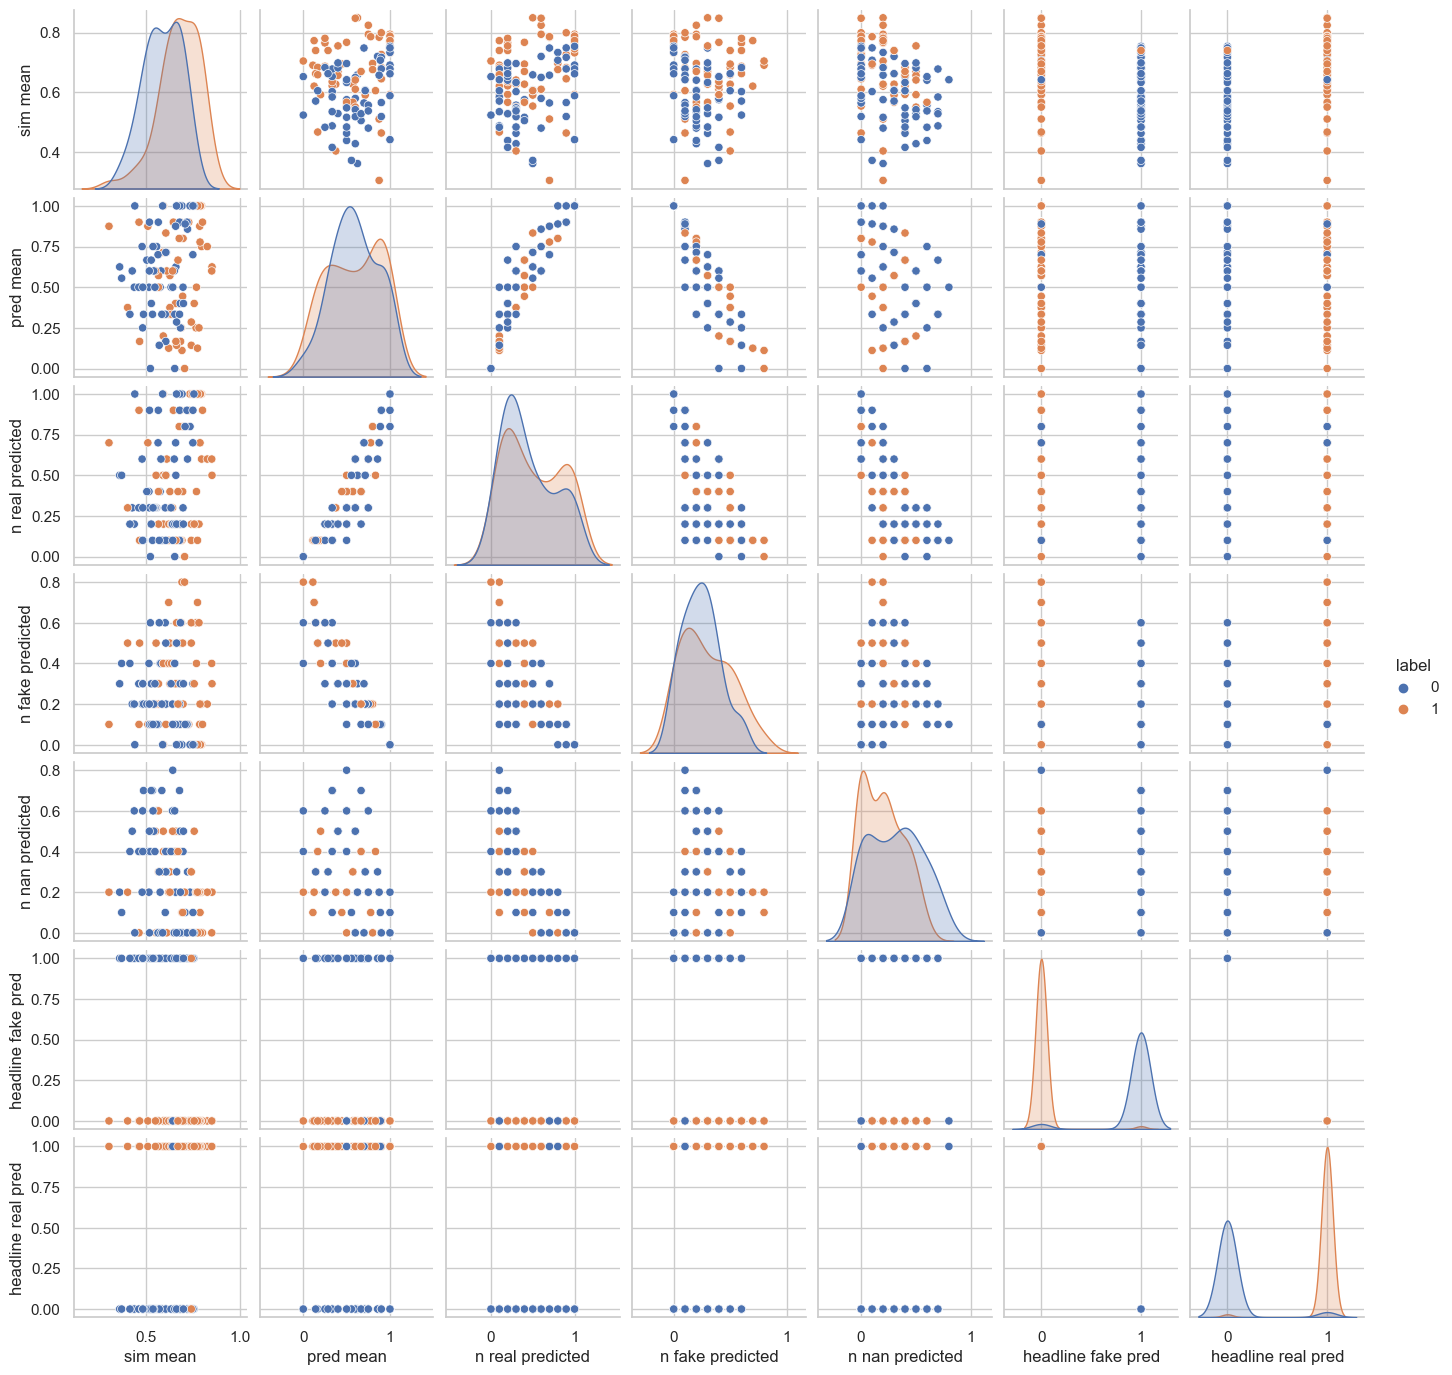

In [29]:

sns.pairplot(df, hue='label', height=2, )

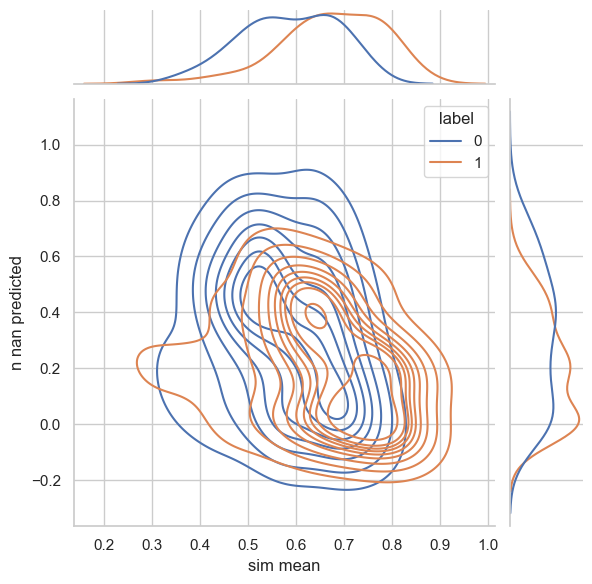

In [30]:
g = sns.jointplot(
    data=df,
    x="sim mean", y="n nan predicted", hue="label",
    kind="kde",
)
g

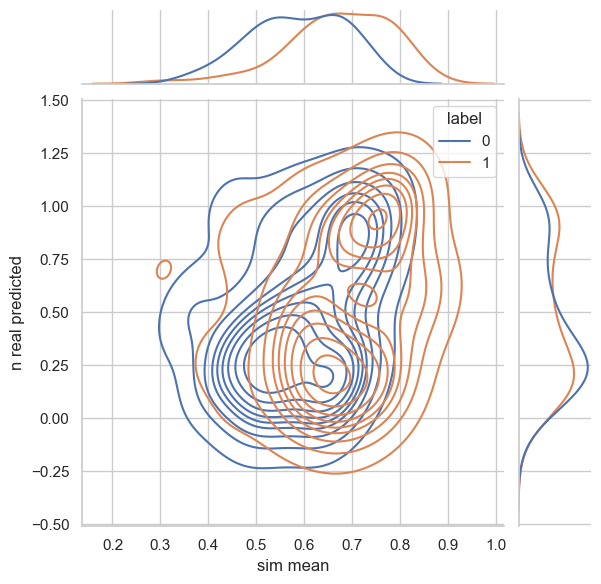

In [31]:
g = sns.jointplot(
    data=df,
    x="sim mean", y="n real predicted", hue="label",
    kind="kde",
)
g

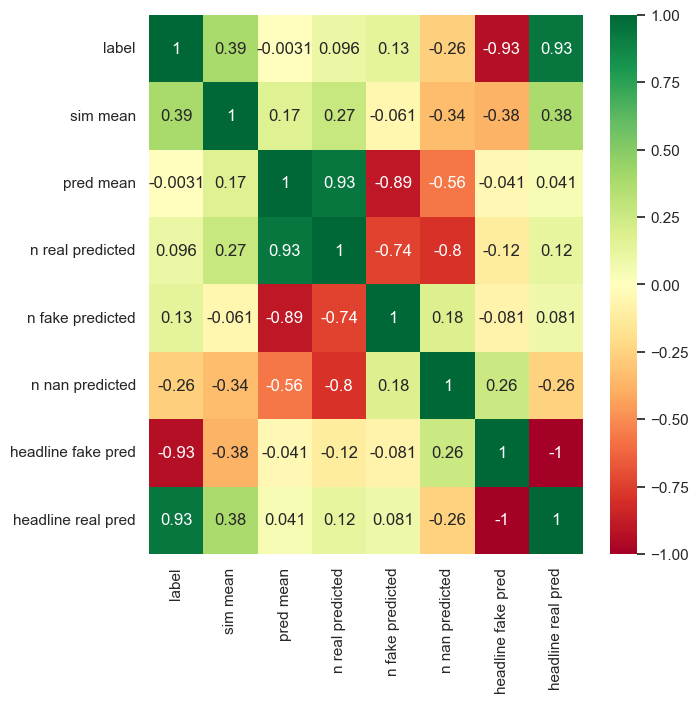

In [32]:
import matplotlib.pyplot as plt
corrmat = df[['label', 
       'sim mean', 'pred mean', 'n real predicted', 'n fake predicted',
       'n nan predicted', 'headline fake pred', 'headline real pred']].corr()
top_corr_features = corrmat.index
plt.figure(figsize = (7,7))
g = sns.heatmap(df[top_corr_features].corr(), annot=True , cmap = 'RdYlGn')

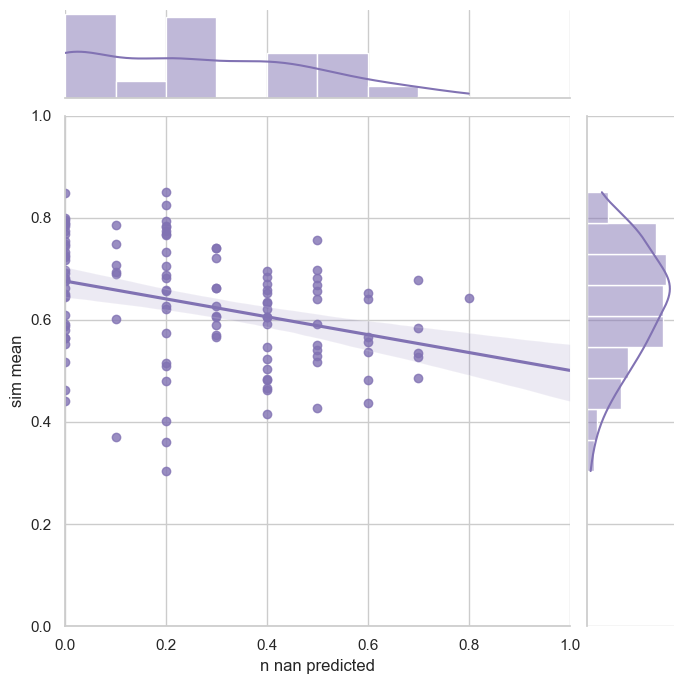

In [33]:

g = sns.jointplot(x="n nan predicted", y="sim mean", data=df,
                  kind="reg", truncate=False,
                  xlim=(0, 1), ylim=(0, 1),
                  color="m", height=7)

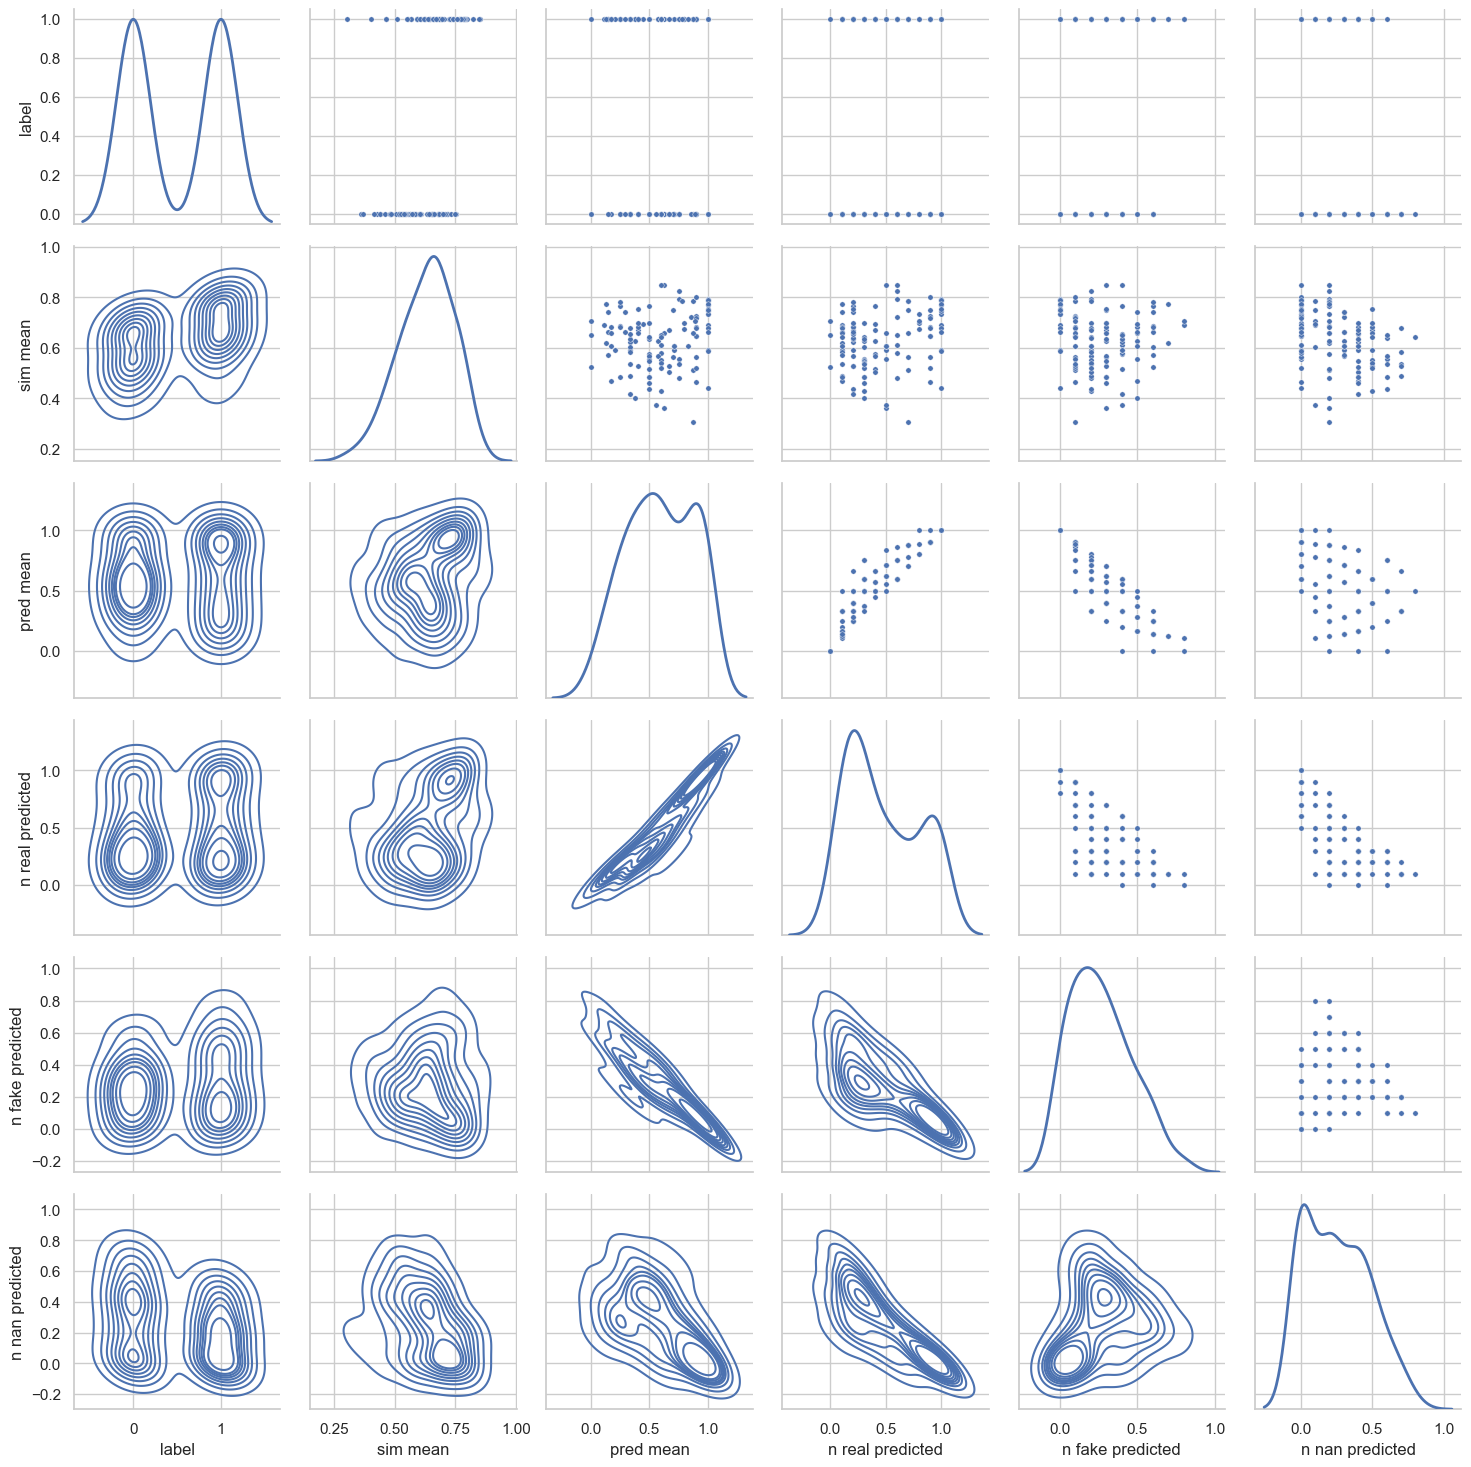

In [34]:


g = sns.PairGrid(df[['label', 
       'sim mean', 'pred mean', 'n real predicted', 'n fake predicted',
       'n nan predicted']], diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

In [39]:
X = np.array(df[['sim mean','pred mean' ,'n real predicted', 'n fake predicted',
       'n nan predicted', 'headline real pred']], dtype='float32')
y = np.array(df['label'])

In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, f1_score
import joblib



#SVM
clfSVM = Pipeline(steps = [('StandardScaler', StandardScaler()),('SVM', SVC(probability=True))])
#logistic regression
clfLOGREG = Pipeline(steps = [('StandardScaler', StandardScaler()),('Logistic Regression', LogisticRegression())])
#XGBoost
clfXGB = Pipeline(steps = [('StandardScaler', StandardScaler()),('XGBoost', XGBClassifier())])
#Naive Bayes
clfNB = Pipeline(steps = [('StandardScaler', StandardScaler()),('Naive Bayes', GaussianNB())])
#Random forest
clfRFC = Pipeline(steps = [('StandardScaler', StandardScaler()),('RFC', RandomForestClassifier())])

models = [clfSVM, clfLOGREG, clfXGB, clfNB, clfRFC]
trained_models =[]

rand_state_dict = defaultdict(list)

for i in range(100):
    #model_scores={}
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
    model_group=[]
    for idx, model in enumerate(models):
        model.fit(X_train, y_train)
        name = list(model.named_steps)[1]
        
        accuracy = model.score(X_test, y_test)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        metrics = {'accuracy':accuracy, 'mae':mae, 'mse':mse, 'f1':f1}  

        for metric in metrics.keys():
            rand_state_dict[metric].append(metrics[metric])
        rand_state_dict['name'].append(name)
        rand_state_dict['rand_state'].append(i)
        
        model_group.append(model)
    
    trained_models.append(model_group)
        
    
        


In [41]:
model_score_df = pd.DataFrame(rand_state_dict)
model_score_df

,accuracy,mae,mse,f1,name,rand_state
0,0.972222,0.027778,0.027778,0.972973,SVM,0
1,0.972222,0.027778,0.027778,0.972973,Logistic Regression,0
2,1.000000,0.000000,0.000000,1.000000,XGBoost,0
3,0.972222,0.027778,0.027778,0.972973,Naive Bayes,0
4,0.972222,0.027778,0.027778,0.972973,RFC,0
...,...,...,...,...,...,...
495,0.972222,0.027778,0.027778,0.972973,SVM,99
496,0.972222,0.027778,0.027778,0.972973,Logistic Regression,99
497,0.972222,0.027778,0.027778,0.972973,XGBoost,99
498,0.972222,0.027778,0.027778,0.972973,Naive Bayes,99


In [60]:
model_score_df[model_score_df['accuracy']== 0.9722222222222222]

,accuracy,mae,mse,f1,name,rand_state
0,0.972222,0.027778,0.027778,0.972973,SVM,0
1,0.972222,0.027778,0.027778,0.972973,Logistic Regression,0
3,0.972222,0.027778,0.027778,0.972973,Naive Bayes,0
4,0.972222,0.027778,0.027778,0.972973,RFC,0
15,0.972222,0.027778,0.027778,0.972973,SVM,3
...,...,...,...,...,...,...
495,0.972222,0.027778,0.027778,0.972973,SVM,99
496,0.972222,0.027778,0.027778,0.972973,Logistic Regression,99
497,0.972222,0.027778,0.027778,0.972973,XGBoost,99
498,0.972222,0.027778,0.027778,0.972973,Naive Bayes,99


In [44]:
model_score_df.sort_values('accuracy', ascending=False)

,accuracy,mae,mse,f1,name,rand_state
401,1.000000,0.000000,0.000000,1.000000,Logistic Regression,80
181,1.000000,0.000000,0.000000,1.000000,Logistic Regression,36
167,1.000000,0.000000,0.000000,1.000000,XGBoost,33
375,1.000000,0.000000,0.000000,1.000000,SVM,75
376,1.000000,0.000000,0.000000,1.000000,Logistic Regression,75
...,...,...,...,...,...,...
283,0.888889,0.111111,0.111111,0.894737,Naive Bayes,56
284,0.888889,0.111111,0.111111,0.894737,RFC,56
287,0.888889,0.111111,0.111111,0.900000,XGBoost,57
449,0.888889,0.111111,0.111111,0.888889,RFC,89


In [45]:
for model in models:
    name = list(model.named_steps)[1]
    print(name, "accuracy mean :",model_score_df[model_score_df['name']==name]['accuracy'].mean())
    print(name, "accuracy median :",model_score_df[model_score_df['name']==name]['accuracy'].median())
    print(name, "accuracy mode :",model_score_df[model_score_df['name']==name]['accuracy'].mode())

SVM accuracy mean : 0.9627777777777777
SVM accuracy median : 0.9722222222222222
SVM accuracy mode : 0    0.972222
Name: accuracy, dtype: float64
Logistic Regression accuracy mean : 0.9597222222222221
Logistic Regression accuracy median : 0.9722222222222222
Logistic Regression accuracy mode : 0    0.972222
Name: accuracy, dtype: float64
XGBoost accuracy mean : 0.9611111111111111
XGBoost accuracy median : 0.9722222222222222
XGBoost accuracy mode : 0    0.972222
Name: accuracy, dtype: float64
Naive Bayes accuracy mean : 0.9627777777777777
Naive Bayes accuracy median : 0.9722222222222222
Naive Bayes accuracy mode : 0    0.972222
Name: accuracy, dtype: float64
RFC accuracy mean : 0.96
RFC accuracy median : 0.9722222222222222
RFC accuracy mode : 0    0.972222
Name: accuracy, dtype: float64


<Axes: xlabel='rand_state', ylabel='accuracy'>

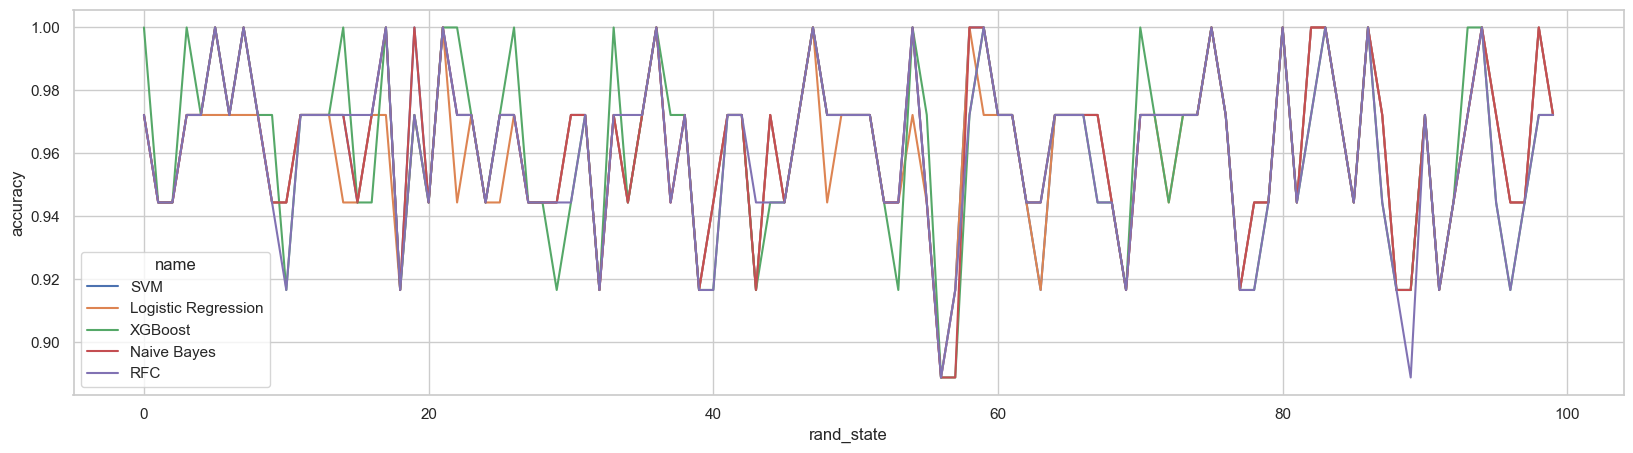

In [46]:
from matplotlib import pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 5))

sns.lineplot(ax=ax, x="rand_state", y="accuracy",
             hue="name",
             data=model_score_df)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99, stratify=y)

In [77]:
np.array_equal(np.array([round(v) for v in trained_models[99][2].predict_proba(X_test)[:,1]]), trained_models[99][2].predict(X_test))

True

In [68]:
joblib.dump(trained_models[99][2], f'XGB-Text-Only-Classifier97ACC.joblib') 

['XGB-Text-Only-Classifier97ACC.joblib']

In [65]:
np.array([1,3,54,6]).shape

(4,)

In [38]:
pd.read_pickle('FULL-SYS-RESULTS.pkl')

,raw texts,texts,labels,language,similarity vals,site predictions,headline real pred,headline fake pred,image real pred,image fake pred
0,"n p ""Td like to think that thanks to me, women...","""I hope that because of me, women athletes can...",0,en,"[0.45773616, 0.31768167, 0.28074682, 0.3007751...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, ...",9.999900e-01,9.986932e-06,0.985129,0.014871
1,"AP Liz Truss promised a shakeup, but she was f...","AP Liz Truss promised a shakeup, but she was f...",0,en,"[0.8471322, 0.8471322, 0.77517736, 0.75493073,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",9.999996e-01,3.447002e-07,0.722271,0.277729
2,CANVA FILE PHOTO DRAMA Sinabi ni Senador Jingg...,Sinabi ni Senador Jinggoy Estrada na minsan ni...,0,tl,"[0.63278866, 0.46414107, 0.79989666, 0.6435388...","[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, nan, ...",1.843235e-03,9.981567e-01,0.613181,0.386819
3,Sam Smith and Kim Petras make LGBTQ history on...,Sam Smith and Kim Petras became the first open...,0,en,"[0.68594474, 0.68594474, 0.69210416, 0.5805509...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, ...",2.189882e-07,9.999998e-01,0.833062,0.166938
4,API BREAKING NEWS U.S. Senate votes to protect...,API Breaking News: The U.S. Senate has voted t...,0,en,"[0.79586303, 0.7157701, 0.73125076, 0.7317108,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, ...",2.193289e-07,9.999998e-01,0.966953,0.033047
...,...,...,...,...,...,...,...,...,...,...
94,THE SHOVEL Business Mark Zuckerberg _ Dead At ...,The shovel business Mark Zuckerberg _ dead at ...,1,en,"[0.9469586, 0.66723824, 0.32727706, 0.65693533...","[0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, ...",2.168481e-07,9.999998e-01,0.777327,0.222673
95,BREAKING NEIS GagreieeohMciht onti Jlotctelcr ...,BREAKING NEWS: Magkakaroon ng pagbabago sa Fli...,1,tl,"[0.52098835, 0.52221715, nan, nan, nan, nan, n...","[0.0, 0.0, nan, nan, nan, nan, nan, nan, nan, ...",1.413580e-07,9.999999e-01,0.048051,0.951949
96,Bong Go Supporters March 23 at 3.34 AM 0 Na DU...,Bong Go supporters will march at 3:34 a.m. on ...,1,en,"[0.1275648, 0.10842293, 0.14868616, 0.1327272,...","[1.0, 1.0, 1.0, 0.0, 1.0, nan, nan, nan, nan, ...",2.065986e-05,9.999794e-01,0.765896,0.234104
97,Alna Diqkakamall [ Ama Anak ay hindi hindi pog...,Ama at anak ay hindi magkakasala sa isa't isa....,1,tl,"[0.5038736, 0.37043825, 0.40694052, 0.4348759,...","[1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, nan, nan, ...",6.767940e-08,9.999999e-01,0.954440,0.045560
